In [1]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
import pandas as pd
from sklearn import metrics
import time
import matplotlib.pyplot as plt
import pandas as pd
from os import path
import gc
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc,roc_auc_score

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
final_train = pd.read_csv("C:\\Users\\CDA\\graduated_design\\data\\final_table\\final_total_feature_174.csv")

In [5]:
final_train = final_table.copy()

user bank表

In [7]:
common_path_1 = "C:\\Users\\CDA\\graduated_design\\data\\train_data\\"
common_path = "C:\\Users\\CDA\\graduated_design\\data\\simp_train_data\\"
common_path_temp = "C:\\Users\\CDA\\graduated_design\\data\\temp_data\\"
overdue_train = pd.read_table(path.join(common_path_1,"overdue_train.txt"),sep = ",",header = None, names = ["user_id","is_overdue"])
len(overdue_train)

55596

In [72]:
read_bro_bef_unique_overdue_44945_82 = pd.read_csv(common_path_temp+"browse_temp_table\\bro_bef_unique_overdue_44945_82.csv")
read_bro_bef_unique_overdue_44945_82.iloc[:3,:]

user_id  is_overdue  browse_behavior_6  browse_behavior_7  \
0        1           0             -999.0             -999.0   
1        2           0                0.0                2.0   
2        3           0                0.0                0.0   

   browse_behavior_13  browse_behavior_15  browse_behavior_20  \
0              -999.0              -999.0              -999.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   

   browse_behavior_23  browse_behavior_25  browse_behavior_28  \
0              -999.0              -999.0              -999.0   
1                 0.0                 2.0                 0.0   
2                 0.0                 0.0                 0.0   

        ...         browse_num_7  browse_num_8  browse_num_10  \
0       ...               -999.0        -999.0         -999.0   
1       ...                  7.0           7.0            5.0   
2       ...                  7.0           0.0            4.0   

   browse_behavior_2000  behavior_total_counts  bh_time_max_diff  \
0                -999.0                 -999.0            -999.0   
1                   2.0                   87.0             222.0   
2                   0.0                   55.0              60.0   

   grant_bh_diff_bef  has_record  total_counts_bef  dup_counts_time  
0             -999.0         0.0            -999.0      -999.000000  
1              248.0         1.0            1305.0        15.000000  
2              231.0         1.0             342.0         6.218182  

[3 rows x 82 columns]

In [80]:
read_bro_bef_unique_overdue_44945_82.to_csv(common_path_temp+"browse_temp_table\\read_bro_bef_unique_overdue_55596_81.csv",index = False)

In [79]:
read_bro_bef_unique_overdue_44945_82

user_id  browse_behavior_6  browse_behavior_7  browse_behavior_13  \
0            1             -999.0             -999.0              -999.0   
1            2                0.0                2.0                 0.0   
2            3                0.0                0.0                 0.0   
3            4                0.0                0.0                 0.0   
4            5             -999.0             -999.0              -999.0   
5            6                0.0                0.0                 0.0   
6            7                0.0                0.0                 0.0   
7            8                0.0                1.0                 0.0   
8            9             -999.0             -999.0              -999.0   
9           10                0.0                0.0                 0.0   
10          11             -999.0             -999.0              -999.0   
11          12                0.0                0.0                 0.0   
12          13             -999.0             -999.0              -999.0   
13          14                0.0                0.0                 0.0   
14          15                0.0                0.0                 0.0   
15          16                0.0                0.0                 0.0   
16          17                0.0                0.0                 0.0   
17          18                0.0                0.0                 0.0   
18          19                0.0                0.0                 0.0   
19          20                0.0                0.0                 0.0   
20          21                0.0                0.0                 0.0   
21          22                0.0                0.0                 0.0   
22          23                0.0                0.0                 0.0   
23          24                0.0                0.0                 0.0   
24          25                0.0                0.0                 0.0   
25          26             -999.0             -999.0              -999.0   
26          27             -999.0             -999.0              -999.0   
27          28                0.0                0.0                 0.0   
28          29                0.0                0.0                 0.0   
29          30                0.0                0.0                 0.0   
...        ...                ...                ...                 ...   
55566    55567                0.0                0.0                 0.0   
55567    55568             -999.0             -999.0              -999.0   
55568    55569                0.0                0.0                 0.0   
55569    55570                0.0                0.0                 0.0   
55570    55571                0.0                0.0                 0.0   
55571    55572                0.0                0.0                 0.0   
55572    55573                0.0                0.0                 0.0   
55573    55574                0.0                0.0                 0.0   
55574    55575             -999.0             -999.0              -999.0   
55575    55576                0.0                0.0                 0.0   
55576    55577                0.0                0.0                 0.0   
55577    55578                0.0                0.0                 0.0   
55578    55579                0.0                0.0                 0.0   
55579    55580                0.0                0.0                 0.0   
55580    55581                0.0                0.0                 0.0   
55581    55582                0.0                0.0                 2.0   
55582    55583                1.0                0.0                 0.0   
55583    55584                0.0                0.0                 0.0   
55584    55585                0.0                0.0                 0.0   
55585    55586                0.0                0.0                 0.0   
55586    55587                0.0                0.0   

In [19]:
#read_bro_bef_unique_overdue_44945_80["dup_counts_time"] = read_bro_bef_unique_overdue_44945_80["total_counts_bef"]/read_bro_bef_unique_overdue_44945_80["behavior_total_counts"]
read_bro_bef_unique_overdue_44945_80.iloc[:,:]
#read_bro_bef_unique_overdue_44945_80["dup_counts_time"].isnull().any()

user_id  browse_behavior_6  browse_behavior_7  browse_behavior_13  \
0            2                0.0                2.0                 0.0   
1            3                0.0                0.0                 0.0   
2            4                0.0                0.0                 0.0   
3            6                0.0                0.0                 0.0   
4            7                0.0                0.0                 0.0   
5            8                0.0                1.0                 0.0   
6           10                0.0                0.0                 0.0   
7           12                0.0                0.0                 0.0   
8           14                0.0                0.0                 0.0   
9           15                0.0                0.0                 0.0   
10          16                0.0                0.0                 0.0   
11          17                0.0                0.0                 0.0   
12          18                0.0                0.0                 0.0   
13          19                0.0                0.0                 0.0   
14          20                0.0                0.0                 0.0   
15          21                0.0                0.0                 0.0   
16          22                0.0                0.0                 0.0   
17          23                0.0                0.0                 0.0   
18          24                0.0                0.0                 0.0   
19          25                0.0                0.0                 0.0   
20          28                0.0                0.0                 0.0   
21          29                0.0                0.0                 0.0   
22          30                0.0                0.0                 0.0   
23          31                0.0                0.0                 0.0   
24          32                0.0                0.0                 0.0   
25          33                0.0                0.0                 0.0   
26          34                0.0                0.0                 0.0   
27          35                0.0                0.0                 0.0   
28          36                0.0                0.0                 0.0   
29          37                0.0                0.0                 0.0   
...        ...                ...                ...                 ...   
44915    55564                0.0                0.0                 0.0   
44916    55565                1.0                0.0                 0.0   
44917    55566                0.0                0.0                 0.0   
44918    55567                0.0                0.0                 0.0   
44919    55569                0.0                0.0                 0.0   
44920    55570                0.0                0.0                 0.0   
44921    55571                0.0                0.0                 0.0   
44922    55572                0.0                0.0                 0.0   
44923    55573                0.0                0.0                 0.0   
44924    55574                0.0                0.0                 0.0   
44925    55576                0.0                0.0                 0.0   
44926    55577                0.0                0.0                 0.0   
44927    55578                0.0                0.0                 0.0   
44928    55579                0.0                0.0                 0.0   
44929    55580                0.0                0.0                 0.0   
44930    55581                0.0                0.0                 0.0   
44931    55582                0.0                0.0                 2.0   
44932    55583                1.0                0.0                 0.0   
44933    55584                0.0                0.0                 0.0   
44934    55585                0.0                0.0                 0.0   
44935    55586                0.0                0.0   

In [20]:
read_bro_bef_unique_overdue_44945_80 = pd.merge(overdue_train,read_bro_bef_unique_overdue_44945_80,how = "left",on = "user_id")
read_bro_bef_unique_overdue_44945_80["has_record"].replace(np.nan,0,inplace = True)
read_bro_bef_unique_overdue_44945_80.replace(np.nan,-999,inplace = True)
read_bro_bef_unique_overdue_44945_80.iloc[:3,:]

user_id  is_overdue  browse_behavior_6  browse_behavior_7  \
0        1           0             -999.0             -999.0   
1        2           0                0.0                2.0   
2        3           0                0.0                0.0   

   browse_behavior_13  browse_behavior_15  browse_behavior_20  \
0              -999.0              -999.0              -999.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   

   browse_behavior_23  browse_behavior_25  browse_behavior_28  \
0              -999.0              -999.0              -999.0   
1                 0.0                 2.0                 0.0   
2                 0.0                 0.0                 0.0   

        ...         browse_num_7  browse_num_8  browse_num_10  \
0       ...               -999.0        -999.0         -999.0   
1       ...                  7.0           7.0            5.0   
2       ...                  7.0           0.0            4.0   

   browse_behavior_2000  behavior_total_counts  bh_time_max_diff  \
0                -999.0                 -999.0            -999.0   
1                   2.0                   87.0             222.0   
2                   0.0                   55.0              60.0   

   grant_bh_diff_bef  has_record  total_counts_bef  dup_counts_time  
0             -999.0         0.0            -999.0      -999.000000  
1              248.0         1.0            1305.0        15.000000  
2              231.0         1.0             342.0         6.218182  

[3 rows x 82 columns]

In [21]:
read_bro_bef_unique_overdue_44945_80.to_csv(common_path_temp+"browse_temp_table\\bro_bef_unique_overdue_44945_82.csv",index = False)

In [38]:
read_user_result = pd.read_csv(common_path_temp+"user_temp_table\\user_train_result.csv")
print(len(read_user_result))
read_user_result.iloc[:3,:]

55596


user_id  gender_0  gender_1  gender_2  ocupation_0  ocupation_2  \
0     3150       0.0       1.0       0.0          0.0          1.0   
1     6965       0.0       1.0       0.0          0.0          1.0   
2     1265       0.0       1.0       0.0          0.0          0.0   

   ocupation_3  ocupation_4  education_0  education_2     ...       \
0          0.0          0.0          0.0          0.0     ...        
1          0.0          0.0          0.0          0.0     ...        
2          1.0          0.0          0.0          0.0     ...        

   marriage_0  marriage_1  marriage_2  marriage_3  marriage_4  residence_0  \
0         0.0         1.0         0.0         0.0         0.0          0.0   
1         0.0         0.0         0.0         1.0         0.0          0.0   
2         0.0         0.0         0.0         1.0         0.0          0.0   

   residence_1  residence_2  residence_3  residence_4  
0          0.0          0.0          0.0          1.0  
1          0.0          1.0          0.0          0.0  
2          1.0          0.0          0.0          0.0  

[3 rows x 22 columns]

In [39]:
final_train = pd.merge(read_bro_bef_unique_overdue_44945_80,read_user_result,how = "inner",on = "user_id")

In [14]:
common_path = "C:\\Users\\CDA\\graduated_design\\data\\simp_train_data\\"
user_train_result = pd.read_csv(path.join(common_path,"user_temp_table\\user_train_result.csv"))
bank_aft_train_result = pd.read_csv(path.join(common_path,"bank_temp_table\\bank_aft_train_result.csv"))
bank_bef_train_result = pd.read_csv(path.join(common_path,"bank_temp_table\\bank_bef_train_result.csv"))
overdue_train = pd.read_table(path.join(common_path_1,"overdue_train.txt"),sep = ",",header = None, names = ["user_id","is_overdue"])

#final_table = pd.merge(user_train_result,bank_aft_train_result,how = "inner","")
user_train_result.iloc[:3,:]

user_id  gender_0  gender_1  gender_2  ocupation_0  ocupation_2  \
0     3150       0.0       1.0       0.0          0.0          1.0   
1     6965       0.0       1.0       0.0          0.0          1.0   
2     1265       0.0       1.0       0.0          0.0          0.0   

   ocupation_3  ocupation_4  education_0  education_2     ...       \
0          0.0          0.0          0.0          0.0     ...        
1          0.0          0.0          0.0          0.0     ...        
2          1.0          0.0          0.0          0.0     ...        

   marriage_0  marriage_1  marriage_2  marriage_3  marriage_4  residence_0  \
0         0.0         1.0         0.0         0.0         0.0          0.0   
1         0.0         0.0         0.0         1.0         0.0          0.0   
2         0.0         0.0         0.0         1.0         0.0          0.0   

   residence_1  residence_2  residence_3  residence_4  
0          0.0          0.0          0.0          1.0  
1          0.0          1.0          0.0          0.0  
2          1.0          0.0          0.0          0.0  

[3 rows x 22 columns]

In [74]:
bro_aft_12171_result = pd.read_csv(common_path+"browse_temp_table\\gb_bro_aft_12171.csv")
bro_aft_12171_result.iloc[:3,:]

user_id  bh_6  bh_7  bh_10  bh_11  bh_12  bh_13  bh_15  bh_20  bh_23  \
0       54   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       72   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       75   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

        ...        b_num_1  b_num_3  b_num_4  b_num_5  b_num_6  b_num_7  \
0       ...            7.0      0.0      4.0      2.0      1.0      1.0   
1       ...            2.0      0.0      0.0      0.0      0.0      0.0   
2       ...            2.0      0.0      0.0      0.0      0.0      1.0   

   b_num_8  b_num_9  b_num_10  bro_aft_counts  
0      1.0      0.0       1.0            17.0  
1      0.0      0.0       0.0             2.0  
2      0.0      0.0       0.0             3.0  

[3 rows x 108 columns]

In [87]:
bro_aft_12171_6 = bro_aft_12171_result.loc[:,["user_id","bro_aft_counts","b_num_1","b_num_5","b_num_4","bh_210"]]

In [89]:
bro_aft_12171_6.to_csv("C:\\Users\\CDA\\graduated_design\\data\\simp_train_data\\browse_temp_table\\bro_aft_12171_6.csv",index = None)

In [83]:
final_train = bro_aft_12171_6.copy()

In [64]:
final_train = bro_aft_12171_result.copy()

In [68]:
read_bill_bef_unique_result = pd.read_csv(common_path_temp+"bill_temp_table\\bill_bef_unique_result_42851_68.csv")


In [34]:
bro_bef_44944_result = pd.read_csv(common_path+"browse_temp_table\\gb_bro_bef_44944.csv")
bro_bef_44944_result.iloc[:3,:]

user_id  bh_bef_6  bh_bef_7  bh_bef_9  bh_bef_10  bh_bef_11  bh_bef_12  \
0        2       0.0       2.0       0.0        0.0        0.0        0.0   
1        3       0.0       0.0       0.0        0.0        0.0        0.0   
2        4       0.0       0.0       0.0        0.0        0.0        0.0   

   bh_bef_13  bh_bef_15  bh_bef_20       ...        b_num_bef_1  b_num_bef_3  \
0        0.0        0.0        0.0       ...               36.0          6.0   
1        0.0        0.0        0.0       ...               27.0          0.0   
2        0.0        0.0        0.0       ...               21.0          1.0   

   b_num_bef_4  b_num_bef_5  b_num_bef_6  b_num_bef_7  b_num_bef_8  \
0         10.0          7.0          9.0          7.0          7.0   
1          8.0          5.0          4.0          7.0          0.0   
2          8.0          5.0          4.0          5.0          1.0   

   b_num_bef_9  b_num_bef_10  bro_bef_counts  
0          0.0           5.0            87.0  
1          0.0           4.0            55.0  
2          0.0           2.0            47.0  

[3 rows x 114 columns]

In [19]:
bro_bef_114_socre = pd.read_csv("C:\\Users\\CDA\\graduated_design\\score\\bro_bef_114.csv")
bro_bef_114_socre[bro_bef_114_socre["f_score"]>100]

Unnamed: 0  f_score
0  bro_bef_counts     1432
1     b_num_bef_1     1265
2     b_num_bef_5     1051

In [28]:
bro_bef_114_socre[bro_bef_114_socre["f_score"]>100]
bro_bef_114_socre.columns = ["feature","score"]

In [30]:
selected_feature = np.array(bro_bef_114_socre["feature"])

In [45]:
final_train = final_train.loc[:,selected_feature]

In [46]:
final_train.replace(np.nan,0,inplace = True)

In [47]:
final_train.to_csv("C:\\Users\\CDA\\graduated_design\\score\\bro_aft_6.csv",index = None)

In [43]:
selected_feature = ['user_id','bro_bef_counts', 'b_num_bef_1', 'b_num_bef_5', 'b_num_bef_4',
       'b_num_bef_8', 'bh_bef_189', 'b_num_bef_7', 'bh_bef_110',
       'b_num_bef_6', 'bh_bef_101', 'b_num_bef_10', 'bh_bef_35',
       'bh_bef_167', 'bh_bef_44', 'bh_bef_118', 'bh_bef_201', 'bh_bef_213',
       'bh_bef_120', 'bh_bef_190', 'bh_bef_82', 'bh_bef_173',
       'b_num_bef_3', 'bh_bef_41', 'bh_bef_155', 'bh_bef_45', 'bh_bef_90',
       'bh_bef_31', 'bh_bef_161', 'bh_bef_28', 'bh_bef_80', 'bh_bef_109',
       'bh_bef_164', 'bh_bef_162', 'bh_bef_210', 'bh_bef_163',
       'bh_bef_139', 'bh_bef_50', 'bh_bef_20', 'bh_bef_53', 'bh_bef_104',
       'bh_bef_157', 'bh_bef_57', 'bh_bef_76', 'bh_bef_38', 'bh_bef_200',
       'bh_bef_51', 'bh_bef_188', 'bh_bef_56', 'bh_bef_15', 'bh_bef_23',
       'bh_bef_25', 'bh_bef_180', 'bh_bef_148', 'bh_bef_91', 'bh_bef_13',
       'bh_bef_119', 'bh_bef_86', 'bh_bef_194', 'bh_bef_75', 'bh_bef_6',
       'bh_bef_88', 'bh_bef_107', 'bh_bef_133', 'bh_bef_89', 'bh_bef_144',
       'bh_bef_34', 'bh_bef_36', 'bh_bef_96', 'bh_bef_12', 'bh_bef_60',
       'bh_bef_105', 'bh_bef_55', 'bh_bef_193', 'bh_bef_106', 'bh_bef_7',
       'bh_bef_146', 'bh_bef_10', 'bh_bef_103', 'b_num_bef_9',
       'bh_bef_143', 'bh_bef_97', 'bh_bef_108', 'bh_bef_59', 'bh_bef_195',
       'bh_bef_151', 'bh_bef_207', 'bh_bef_11', 'bh_bef_197', 'bh_bef_62',
       'bh_bef_178', 'bh_bef_77', 'bh_bef_202', 'bh_bef_191', 'bh_bef_149',
       'bh_bef_42', 'bh_bef_64', 'bh_bef_33', 'bh_bef_150', 'bh_bef_208',
       'bh_bef_130', 'bh_bef_39']

In [22]:
final_train = read_bro_bef_unique_overdue_44945_80
final_train.iloc[:3,:]

user_id  is_overdue  browse_behavior_6  browse_behavior_7  \
0        1           0             -999.0             -999.0   
1        2           0                0.0                2.0   
2        3           0                0.0                0.0   

   browse_behavior_13  browse_behavior_15  browse_behavior_20  \
0              -999.0              -999.0              -999.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   

   browse_behavior_23  browse_behavior_25  browse_behavior_28  \
0              -999.0              -999.0              -999.0   
1                 0.0                 2.0                 0.0   
2                 0.0                 0.0                 0.0   

        ...         browse_num_7  browse_num_8  browse_num_10  \
0       ...               -999.0        -999.0         -999.0   
1       ...                  7.0           7.0            5.0   
2       ...                  7.0           0.0            4.0   

   browse_behavior_2000  behavior_total_counts  bh_time_max_diff  \
0                -999.0                 -999.0            -999.0   
1                   2.0                   87.0             222.0   
2                   0.0                   55.0              60.0   

   grant_bh_diff_bef  has_record  total_counts_bef  dup_counts_time  
0             -999.0         0.0            -999.0      -999.000000  
1              248.0         1.0            1305.0        15.000000  
2              231.0         1.0             342.0         6.218182  

[3 rows x 82 columns]

In [6]:
read_bro_bef_94 = pd.read_table(path.join(common_path,"browse_temp_table\\bro_bef_result_95.txt"),header = None,names = bro_bef_cols_94,sep = ",")
read_bro_bef_94.iloc[:3,:]

NameError: name 'bro_bef_cols_94' is not defined

In [24]:
final_table = pd.merge(overdue_train,read_bro_aft_result,how = "left",on = "user_id")
final_table.replace(np.nan,0,inplace = True)
final_table = final_table.apply(lambda x: x.astype("int"))

final_table.iloc[:3,:]

user_id  is_overdue  bh__6  bh__7  bh__9  bh__10  bh__11  bh__12  bh__13  \
0        1           0      0      0      0       0       0       0       0   
1        2           0      0      0      0       0       0       0       0   
2        3           0      0      0      0       0       0       0       0   

   bh__15       ...        b_num_2  b_num_3  b_num_4  b_num_5  b_num_6  \
0       0       ...              0        0        0        0        0   
1       0       ...              0        0        0        0        0   
2       0       ...              0        0        0        0        0   

   b_num_7  b_num_8  b_num_9  b_num_10  bro_aft_counts  
0        0        0        0         0               0  
1        0        0        0         0               0  
2        0        0        0         0               0  

[3 rows x 116 columns]

In [39]:
final_table = pd.merge(user_train_result,bank_aft_train_result,how = "inner",on = "user_id")
final_table = pd.merge(final_table,bank_bef_train_result,how = "inner",on = "user_id")
#final_table = pd.merge(final_table,bro_bef_overd_result,how = "inner",on = "user_id")
final_table = pd.merge(final_table,overdue_train,how = "inner",on = "user_id")
final_table.iloc[:3,:]

user_id  gender_0  gender_1  gender_2  ocupation_0  ocupation_2  \
0     3150       0.0       1.0       0.0          0.0          1.0   
1     6965       0.0       1.0       0.0          0.0          1.0   
2     1265       0.0       1.0       0.0          0.0          0.0   

   ocupation_3  ocupation_4  education_0  education_2     ...      \
0          0.0          0.0          0.0          0.0     ...       
1          0.0          0.0          0.0          0.0     ...       
2          1.0          0.0          0.0          0.0     ...       

   residence_4  bank_aft_expenditure  bank_aft_revenue  bank_aft_income  \
0          1.0              0.000000          0.000000              0.0   
1          0.0             12.147230          0.000000              0.0   
2          0.0             51.762021         13.063517              0.0   

   bank_aft_diff_rev_exped  bank_bef_expenditure  bank_bef_revenue  \
0                 0.000000              0.000000          0.000000   
1                 0.000000           3222.384745        972.850228   
2               -38.698504           3610.695042       1695.142678   

   bank_bef_income  bank_bef_diff_rev_exped  is_overdue  
0              0.0                 0.000000           0  
1              0.0             -2249.534517           0  
2              0.0             -1915.552364           0  

[3 rows x 31 columns]

In [9]:


read_bro_bef_result_93 = pd.read_table(path.join(common_path,"browse_temp_table\\bro_bef_result_93.txt"),sep = ",",header = None,names = bro_bef_cols_93,index_col = False)

#overdue_train = pd.read_table(path.join(common_path,"overdue_train.txt"),sep = ",",header = None, names = ["user_id","is_overdue"])
#final_table = pd.merge(bro_bef_overd_result,overdue_train,how = "left",on = "user_id")
#final_table.replace(np.nan,0,inplace = True)
read_bro_bef_result_93["bh__6"]


0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
5        1.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       1.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
55566    0.0
55567    0.0
55568    0.0
55569    0.0
55570    1.0
55571    0.0
55572    0.0
55573    0.0
55574    0.0
55575    0.0
55576    0.0
55577    0.0
55578    0.0
55579    0.0
55580    0.0
55581    0.0
55582    0.0
55583    0.0
55584    0.0
55585    0.0
55586    0.0
55587    0.0
55588    0.0
55589    0.0
55590    0.0
55591    0.0
55592    1.0
55593    0.0
55594    0.0
55595    0.0
Name: bh__6, dtype: float64

In [12]:
print(read_bro_bef_result_93["bh__6"].sum())
print(overdue_train["is_overdue"].sum())

7183.0
7183


In [70]:
np.savetxt(path.join(common_path,"browse_temp_table\\bro_bef_result_93.txt"),bro_bef_result_93.values,delimiter = ",",header = '')
#bro_bef_result_93.to_csv(path.join(common_path,"browse_temp_table\\bro_bef_result_93.csv",index = None,header = True,encoding = "utf8")

In [134]:
#final_table.replace(np.nan,0,inplace = True)
read_bro_bef_result_93_ = read_bro_bef_result_93_.apply(lambda x: x.astype("int"))
read_bro_bef_result_93_.iloc[:3,:]

user_id  bro_bef_counts  bh__103  bh__119  b_num_2  b_num_7  b_num_4  bh__6
0        1               0        0        0        0        0        0      0
1        2              87        2        6       36        7       10      0
2        3              55        3        6       27        7        8      0

In [109]:
?pd.set_option("display.")
read_bro_bef_result_93

user_id  bh__6  bh__7  bh__10  bh__11  bh__12  bh__13  bh__15  bh__20  \
0            1      0      0       0       0       0       0       0       0   
1            2      0      0       0       0       0       0       0       0   
2            3      0      0       0       0       0       0       0       0   
3            4      1      0       0       0       0       0       0       0   
4            5      0      0       0       0       0       0       0       0   
5            6      1      0       0       0       0       0       0       0   
6            7      0      0       0       0       0       0       0       1   
7            8      0      0       0       0       0       0       0       0   
8            9      0      0       0       0       0       0       0       0   
9           10      0      0       0       0       0       0       0       0   
10          11      0      0       0       0       0       0       0       0   
11          12      0      0       0       0       0       0       0       0   
12          13      0      0       0       0       0       0       0       0   
13          14      0      0       0       0       0       0       0       0   
14          15      0      0       0       0       0       0       0       0   
15          16      0      0       0       0       0       0       0       0   
16          17      0      0       0       0       0       0       0       8   
17          18      0      0       0       0       0       0       0       0   
18          19      0      0       0       0       0       0       0       0   
19          20      0      0       0       0       0       0       0       0   
20          21      0      0       0       0       0       0       0       0   
21          22      0      0       0       0       0       0       0       0   
22          23      0      0       0       0       0       0       0       0   
23          24      0      0       0       0       0       0       0       0   
24          25      1      0       0       0       0       0       0       0   
25          26      0      0       0       0       0       0       0       0   
26          27      0      0       0       0       0       0       0       0   
27          28      0      0       0       0       0       0       0       0   
28          29      0      0       0       0       0       0       0       0   
29          30      0      0       0       0       0       0       0       0   
...        ...    ...    ...     ...     ...     ...     ...     ...     ...   
55566    55567      0      0       0       0       0       0       0       0   
55567    55568      0      0       0       0       0       0       0       0   
55568    55569      0      0       0       0       0       0       0       0   
55569    55570      0      0       0       0       0       0       0       0   
55570    55571      1      0       0       0       0       0       0       0   
55571    55572      0      0       0       0       0       0       0       0   
55572    55573      0      0       0       0       0       0       0       0   
55573    55574      0      0       0       0       0       0       0       0   
55574    55575      0      0       0       0       0       0       0       0   
55575    55576      0      0       0       0       0       0       0       0   
55576    55577      0      0       0       0       0       0       0       0   
55577    55578      0      0       0       0       0       0       0       0   
55578    55579      0      0       0       0       0       0       0       0   
55579    55580      0      0       0       0       0       0       0       0   
55580    55581      0      0       0       0       0       0       0       0   
55581    55582      0      0       0       0       0       0       2       0   
55582    55583      0      1       0       0       0       0       0       0   
55583    55584      0      0       0       0       0       0       0       0   
55584  

In [149]:
a = pd.merge(read_bro_bef_result_93,overdue_train,how = "left",on = "user_id")
b = a.loc[:,["bh__6","is_overdue"]]
b.sum()

bh__6         7183.0
is_overdue    7183.0
dtype: float64

In [145]:
len(overdue_train)

5000

In [7]:
drop_col = ["bh__188","bh__157","bh__161","bh__96","bh__197","bh__31","bh__28","bh__9",
            "bh__23","bh__149","bh__77","bh__25","bh__194","bh__82","bh__162","bh__105",
           "bh__51","bh__164","bh__91","bh__33","bh__143",'bh__53']
#final_table = final_table.drop(drop_col,axis = 1)
bro_bef_cols = ['user_id','bh__6', 'bh__7', 'bh__9', 'bh__10', 'bh__11', 'bh__12',
       'bh__13', 'bh__15', 'bh__20', 'bh__23', 'bh__25', 'bh__28',
       'bh__31', 'bh__33', 'bh__34', 'bh__35', 'bh__36', 'bh__37',
       'bh__38', 'bh__39', 'bh__41', 'bh__42', 'bh__43', 'bh__44',
       'bh__45', 'bh__46', 'bh__50', 'bh__51', 'bh__53', 'bh__55',
       'bh__56', 'bh__57', 'bh__59', 'bh__60', 'bh__62', 'bh__64',
       'bh__66', 'bh__75', 'bh__76', 'bh__77', 'bh__80', 'bh__82',
       'bh__86', 'bh__88', 'bh__89', 'bh__90', 'bh__91', 'bh__96',
       'bh__97', 'bh__101', 'bh__103', 'bh__104', 'bh__105', 'bh__106',
       'bh__107', 'bh__108', 'bh__109', 'bh__110', 'bh__118', 'bh__119',
       'bh__120', 'bh__123', 'bh__130', 'bh__133', 'bh__138', 'bh__139',
       'bh__143', 'bh__144', 'bh__146', 'bh__147', 'bh__148', 'bh__149',
       'bh__150', 'bh__151', 'bh__152', 'bh__153', 'bh__155', 'bh__157',
       'bh__161', 'bh__162', 'bh__163', 'bh__164', 'bh__166', 'bh__167',
       'bh__173', 'bh__178', 'bh__180', 'bh__188', 'bh__189', 'bh__190',
       'bh__191', 'bh__193', 'bh__194', 'bh__195', 'bh__197', 'bh__200',
       'bh__201', 'bh__202', 'bh__207', 'bh__208', 'bh__209', 'bh__210',
       'bh__213','b_num_1','b_num_2','b_num_3','b_num_4','b_num_5','b_num_6','b_num_7','b_num_8','b_num_9','b_num_10','bro_bef_counts']
#for drop in drop_col:
#    if drop in bro_bef_cols:
#        bro_bef_cols.remove(drop)
#print(len(bro_bef_cols))
bro_bef_cols_93 = ['user_id', 'bh__6', 'bh__7', 'bh__10', 'bh__11', 'bh__12', 'bh__13',
       'bh__15', 'bh__20', 'bh__34', 'bh__35', 'bh__36', 'bh__37',
       'bh__38', 'bh__39', 'bh__41', 'bh__42', 'bh__43', 'bh__44',
       'bh__45', 'bh__46', 'bh__50', 'bh__55', 'bh__56',
       'bh__57', 'bh__59', 'bh__60', 'bh__62', 'bh__64', 'bh__66',
       'bh__75', 'bh__76', 'bh__80', 'bh__86', 'bh__88', 'bh__89',
       'bh__90', 'bh__97', 'bh__101', 'bh__103', 'bh__104', 'bh__106',
       'bh__107', 'bh__108', 'bh__109', 'bh__110', 'bh__118', 'bh__119',
       'bh__120', 'bh__123', 'bh__130', 'bh__133', 'bh__138', 'bh__139',
       'bh__144', 'bh__146', 'bh__147', 'bh__148', 'bh__150', 'bh__151',
       'bh__152', 'bh__153', 'bh__155', 'bh__163', 'bh__166', 'bh__167',
       'bh__173', 'bh__178', 'bh__180', 'bh__189', 'bh__190', 'bh__191',
       'bh__193', 'bh__195', 'bh__200', 'bh__201', 'bh__202', 'bh__207',
       'bh__208', 'bh__209', 'bh__210', 'bh__213', 'b_num_1', 'b_num_2',
       'b_num_3', 'b_num_4', 'b_num_5', 'b_num_6', 'b_num_7', 'b_num_8',
       'b_num_9', 'b_num_10', 'bro_bef_counts']


In [21]:
print(final_table.shape)
final_table.iloc[:3,:]
final_table["is_overdue"].value_counts()

(55596, 116)


0    48413
1     7183
Name: is_overdue, dtype: int64

only user_train table(2) 05759

In [135]:
final_train = read_bro_bef_result_93_.copy()
final_train = pd.merge(final_train,overdue_train,how = "inner",on = "user_id")


In [31]:
#del final_train["is_overdue_y"]
final_train.rename(columns = {"is_overdue_x":"is_overdue"},inplace = True)

In [33]:
final_train.iloc[:10,:]

is_overdue  browse_behavior_6  browse_behavior_7  browse_behavior_13  \
0           0             -999.0             -999.0              -999.0   
1           0                0.0                2.0                 0.0   
2           0                0.0                0.0                 0.0   
3           1                0.0                0.0                 0.0   
4           0             -999.0             -999.0              -999.0   
5           1                0.0                0.0                 0.0   
6           0                0.0                0.0                 0.0   
7           0                0.0                1.0                 0.0   
8           0             -999.0             -999.0              -999.0   
9           0                0.0                0.0                 0.0   

   browse_behavior_15  browse_behavior_20  browse_behavior_23  \
0              -999.0              -999.0              -999.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4              -999.0              -999.0              -999.0   
5                 0.0                 0.0                 0.0   
6                 1.0                 0.0                 1.0   
7                 0.0                 0.0                 4.0   
8              -999.0              -999.0              -999.0   
9                 0.0                 0.0                 0.0   

   browse_behavior_25  browse_behavior_28  browse_behavior_31  \
0              -999.0              -999.0              -999.0   
1                 2.0                 0.0                 2.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4              -999.0              -999.0              -999.0   
5                 0.0                 0.0                 0.0   
6                 0.0                 0.0                 0.0   
7                 1.0                 0.0                 0.0   
8              -999.0              -999.0              -999.0   
9                 0.0                 0.0                 2.0   

        ...         browse_num_7  browse_num_8  browse_num_10  \
0       ...               -999.0        -999.0         -999.0   
1       ...                  7.0           7.0            5.0   
2       ...                  7.0           0.0            4.0   
3       ...                  5.0           1.0            2.0   
4       ...               -999.0        -999.0         -999.0   
5       ...                  3.0           0.0            0.0   
6       ...                  8.0           1.0            6.0   
7       ...                 12.0           1.0           12.0   
8       ...               -999.0        -999.0         -999.0   
9       ...                  3.0           4.0            2.0   

   browse_behavior_2000  behavior_total_counts  bh_time_max_diff  \
0                -999.0                 -999.0            -999.0   
1                   2.0                   87.0             222.0   
2                   0.0                   55.0              60.0   
3                   0.0                   47.0             114.0   
4                -999.0                 -999.0            -999.0   
5                   0.0                    3.0             142.0   
6                   0.0                   72.0             267.0   
7                   1.0                  101.0             290.0   
8                -999.0                 -999.0            -999.0   
9                   0.0                   32.0               0.0   

   grant_bh_diff_bef  has_record  total_counts_bef  dup_counts_time  
0             -999.0         0.0            -999.0      -999.000000  
1              248.0         1.0            1305.0        15.000000  
2              231.0         1.0             342.0         6.218182  


In [53]:
read_bro_aft_unique_12171_61 = pd.read_csv(common_path_temp+"browse_temp_table\\bro_aft_unique_12171_61.csv")
read_bro_aft_unique_12171_61["has_record"] = 1

read_bro_aft_unique_12171_61 = pd.merge(overdue_train,read_bro_aft_unique_12171_61,how = "left",on = "user_id")
read_bro_aft_unique_12171_61["has_record"].replace(np.nan,0,inplace = True)
read_bro_aft_unique_12171_61.replace(np.nan,-999,inplace = True)
read_bro_aft_unique_12171_61.iloc[:3,:]

user_id  is_overdue  browse_behavior_10  browse_behavior_23  \
0        1           0              -999.0              -999.0   
1        2           0              -999.0              -999.0   
2        3           0              -999.0              -999.0   

   browse_behavior_28  browse_behavior_31  browse_behavior_34  \
0              -999.0              -999.0              -999.0   
1              -999.0              -999.0              -999.0   
2              -999.0              -999.0              -999.0   

   browse_behavior_35  browse_behavior_38  browse_behavior_41     ...      \
0              -999.0              -999.0              -999.0     ...       
1              -999.0              -999.0              -999.0     ...       
2              -999.0              -999.0              -999.0     ...       

   browse_num_8  browse_num_9  browse_num_10  browse_num_11  bh_aft_counts  \
0        -999.0        -999.0         -999.0         -999.0         -999.0   
1        -999.0        -999.0         -999.0         -999.0         -999.0   
2        -999.0        -999.0         -999.0         -999.0         -999.0   

   total_aft_counts  total_dup_rate  diff_aft_max_min  max_grant_diff_aft  \
0            -999.0          -999.0            -999.0              -999.0   
1            -999.0          -999.0            -999.0              -999.0   
2            -999.0          -999.0            -999.0              -999.0   

   has_record  
0         0.0  
1         0.0  
2         0.0  

[3 rows x 63 columns]

In [54]:
read_bro_aft_unique_12171_61.to_csv(common_path_temp+"browse_temp_table\\bro_aft_unique_overdue_12171_63.csv",index = False)

In [70]:
read_bill_bef_unique_result["bill_unique_has_record"] = 1
#final_train = pd.merge(overdue_train,read_bill_bef_unique_result,how = "left",on = "user_id")
#final_train.replace(np.nan,-999,inplace = True)
read_bill_bef_unique_result.to_csv("C:\\Users\\CDA\\graduated_design\\data\\temp_data\\bill_temp_table\\bill_bef_unique_result_55596_69.csv",index = False)

In [91]:
bill_bef_unique_result_55596_69 = pd.read_csv("C:\\Users\\CDA\\graduated_design\\data\\temp_data\\bill_temp_table\\bill_bef_unique_result_55596_69.csv")
bro_bef_unique_overdue_55596_81 = pd.read_csv("C:\\Users\\CDA\\graduated_design\\data\\temp_data\\browse_temp_table\\bro_bef_unique_overdue_55596_81.csv")
user_train_result = pd.read_csv("C:\\Users\\CDA\\graduated_design\\data\\temp_data\\user_temp_table\\user_train_result.csv")
bank_train_result = pd.read_csv("C:\\Users\\CDA\\graduated_design\\data\\temp_data\\bank_temp_table\\bank_train_result.csv")

In [98]:
final_table = pd.merge(bill_bef_unique_result_55596_69,bro_bef_unique_overdue_55596_81,how = "inner",on = "user_id")
final_table = pd.merge(final_table,user_train_result,how = "inner",on = "user_id")
final_table = pd.merge(final_table,bank_train_result,how = "inner",on = "user_id")
final_table = pd.merge(final_table,overdue_train,how = "inner",on = "user_id")


In [89]:
bill_bef_unique_result_42851_69 = pd.merge(overdue_train,bill_bef_unique_result_42851_69,how = "left",on = "user_id")
del bill_bef_unique_result_42851_69["is_overdue"]
bill_bef_unique_result_42851_69.replace(np.nan,-999,inplace = True)
bill_bef_unique_result_42851_69

user_id  bill_bank_card_num  bl_last_bill_amountmean  \
0            1              -999.0              -999.000000   
1            2                 3.0                15.195646   
2            3              -999.0              -999.000000   
3            4                 3.0                 7.240665   
4            5              -999.0              -999.000000   
5            6                 3.0                17.460118   
6            7                 4.0                 4.218981   
7            8              -999.0              -999.000000   
8            9                 3.0                14.570759   
9           10                 3.0                13.445129   
10          11              -999.0              -999.000000   
11          12                 4.0                 6.944651   
12          13                 3.0                18.603555   
13          14                 1.0                18.251007   
14          15                 1.0                18.946524   
15          16                 1.0                12.273145   
16          17                 5.0                18.096662   
17          18                 1.0                21.395367   
18          19              -999.0              -999.000000   
19          20                 1.0                15.390733   
20          21                 2.0                 0.000000   
21          22                 1.0                18.406399   
22          23                 1.0                -3.881739   
23          24                 4.0                 7.363951   
24          25                 1.0                 0.000000   
25          26                 1.0                19.540634   
26          27                 2.0                18.323158   
27          28              -999.0              -999.000000   
28          29                 1.0                19.012330   
29          30              -999.0              -999.000000   
...        ...                 ...                      ...   
55566    55567                 1.0                 0.000000   
55567    55568              -999.0              -999.000000   
55568    55569                 2.0                 6.876254   
55569    55570                 1.0                 0.000000   
55570    55571                 1.0                 6.213923   
55571    55572                 3.0                 9.920194   
55572    55573                 3.0                13.250415   
55573    55574                 8.0                12.372620   
55574    55575              -999.0              -999.000000   
55575    55576                 1.0                19.973249   
55576    55577              -999.0              -999.000000   
55577    55578                 4.0                 2.948075   
55578    55579                 2.0                12.957419   
55579    55580                 1.0                14.129056   
55580    55581                 1.0                13.120208   
55581    55582              -999.0              -999.000000   
55582    55583              -999.0              -999.000000   
55583    55584                 2.0                11.435975   
55584    55585                 1.0                21.126362   
55585    55586              -999.0              -999.000000   
55586    55587              -999.0              -999.000000   
55587    55588                 2.0                 9.274901   
55588    55589                 3.0                 9.497069   
55589    55590                 4.0                16.541015   
55590    55591                 4.0                 9.552546   
55591    55592              -999.0              -999.000000   
55592    55593                 4.0                 7.271436   
55593    55594                 2.0                19.664806   
55594    55595                 5.0                 6.737124   
55595    55596                 1.0                19.525853   

       bl_credit_limitmean  bl_bill_balancemean  bl_lowest_repay_limitmean  \
0              -999.00

In [90]:
bill_bef_unique_result_42851_69.to_csv("C:\\Users\\CDA\\graduated_design\\data\\temp_data\\bill_temp_table\\bill_bef_unique_result_55596_69.csv",index = False)

In [99]:
#final_table = read_102.copy()
#final_table = pd.merge(final_table,overdue_train,how = "inner",on = "user_id")
offline_,offline_test = train_test_split(final_table, test_size = 0.33,random_state=1)#41697/13899
offline_test_X=offline_test.drop(["user_id","is_overdue"],axis=1)
xgb_offline_test = xgb.DMatrix(offline_test_X)


In [11]:
final_train = pd.merge(final_train,overdue_train,how = "inner",on = "user_id")

print(len(final_train.columns))
final_train = final_train.drop("user_id",axis = 1)
print(len(final_train.columns))

final_y = final_train["is_overdue"].values
final_x = final_train.iloc[:,:-1].values

175
174


In [104]:
xgb_train_xy,xgb_val_xy = train_test_split(final_train,test_size = 0.25,random_state = 7)

xgb_train_x = xgb_train_xy.drop("is_overdue",axis = 1)
xgb_train_y = xgb_train_xy.is_overdue
xgb_val_x = xgb_val_xy.drop("is_overdue",axis = 1)
xgb_val_y = xgb_val_xy.is_overdue
xgb_dtrain = xgb.DMatrix(xgb_train_x,label = xgb_train_y)
xgb_dval = xgb.DMatrix(xgb_val_x,label = xgb_val_y)


In [34]:
offline_x = offline_xy.drop(["is_overdue","user_id"],axis = 1)
offline_y = offline_xy["is_overdue"]

In [2]:
import os
final_train = pd.read_csv("C:\\Users\\CDA\\graduated_design\\data\\final_table\\final_total_feature_174.csv")


common_path_1 = "C:\\Users\\CDA\\graduated_design\\data\\train_data\\"
overdue_train = pd.read_table(os.path.join(common_path_1,"overdue_train.txt"),sep = ",",header = None, names = ["user_id","is_overdue"])
final_train = pd.merge(final_train,overdue_train,how = "inner",on = "user_id")
train_val_xy,offline_xy = train_test_split(final_train,test_size = 0.15,random_state = 7)


train_val_x = train_val_xy.drop(["user_id","is_overdue"],axis = 1)
train_val_y = train_val_xy["is_overdue"]

train_xy,val_xy = train_test_split(train_val_xy,test_size = 0.2,random_state = 7)
train_X = train_xy.drop(["user_id","is_overdue"],axis = 1)
train_y = train_xy["is_overdue"]
val_X = val_xy.drop(["user_id","is_overdue"],axis = 1)
val_y = val_xy["is_overdue"]


In [57]:
final_train = pd.read_csv("C:\\Users\\CDA\\graduated_design\\data\\final_table\\final_total_feature_174.csv")
final_feature = pd.read_csv("C:\\Users\\CDA\\graduated_design\\score\\final_feature.csv")

list_final_feature = final_feature["final_feture"].tolist()

list_final_feature.extend(["user_id"])
final_train = final_train[list_final_feature]



common_path_1 = "C:\\Users\\CDA\\graduated_design\\data\\train_data\\"
overdue_train = pd.read_table(os.path.join(common_path_1,"overdue_train.txt"),sep = ",",header = None, names = ["user_id","is_overdue"])
final_train = pd.merge(final_train,overdue_train,how = "inner",on = "user_id")
train_val_xy,offline_xy = train_test_split(final_train,test_size = 0.15,random_state = 7)
offline_x = offline_xy.drop(["user_id","is_overdue"],axis = 1)
offline_y = offline_xy["is_overdue"]

train_val_x = train_val_xy.drop(["user_id","is_overdue"],axis = 1)
train_val_y = train_val_xy["is_overdue"]

train_xy,val_xy = train_test_split(train_val_xy,test_size = 0.2,random_state = 7)
train_X = train_xy.drop(["user_id","is_overdue"],axis = 1)
train_y = train_xy["is_overdue"]
val_X = val_xy.drop(["user_id","is_overdue"],axis = 1)
val_y = val_xy["is_overdue"]

In [54]:
from xgboost.sklearn import XGBClassifier
start_time = time.time()
params1 = {
    "booster":"gbtree",
    "objective":"binary:logistic",
    "scale_pos_weight" : 1.0/7.7,
    "eval_metric" : "auc",
    "gamma" : 0.1,
    "max_depth" : 7,
    "lambda" : 5,#控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    "subsample" : 0.7,
    "colsample_bytree" : 0.7,
    "min_child_weight" : 2.5,
    "seed" : 12,
    "eta" : 0.03,
}
#watchlist = [(xgb_dtrain, 'train'),(xgb_dval, 'val')]


#param_test1 ={'n_estimators':range(10,71,10)}  
#gsearch1= GridSearchCV(estimator =RandomForestClassifier(min_samples_split=100,min_samples_leaf=20,max_depth=8,max_features='sqrt',random_state=10),   
                       #param_grid =param_test1,scoring='roc_auc',cv=5)  
#gsearch1.fit(X,y)  

model = xgb.XGBClassifier(n_estimators = 400,colsample_bytree = 1,random_state = 10,max_depth=4,subsample = 0.8,min_child_weight = 7,
                         scale_pos_weight = 0.6,gamma = 0.1,reg_lambda = 4,learning_rate = 0.04)  
param_dist = {
              "learning_rate":[0.04,0.03],
              "max_depth":[4,5]
              }  
grid_search = GridSearchCV(model,param_grid = param_dist,scoring = "roc_auc", cv = 5,verbose=15, n_jobs=2)  
grid_search.fit(train_X, train_y)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

#model = xgb.train(params1,xgb_dtrain,num_boost_round = 6000,early_stopping_rounds = 200,evals = watchlist)
#model.save_model(path.join(common_path.split("data")[0],"model1\\xgb.py"))
#model.save_model
#print("best best_ntree_limit",model.best_ntree_limit)
#print("best best_iteration",model.best_iteration)
cost_time = time.time()-start_time
print(cost_time)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:  3.9min
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:  3.9min
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:  5.8min
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:  6.2min
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:  8.1min
[Parallel(n_jobs=2)]: Done   8 tasks      | elapsed:  8.6min
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed: 10.5min
[Parallel(n_jobs=2)]: Done  10 tasks      | elapsed: 10.9min
[Parallel(n_jobs=2)]: Done  11 tasks      | elapsed: 12.4min
[Parallel(n_jobs=2)]: Done  12 tasks      | elapsed: 12.9min
[Parallel(n_jobs=2)]: Done  13 tasks      | elapsed: 14.3min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed: 14.7min
[Parallel(n_jobs=2)]: Done  15 tasks      | elapsed: 16.2min
[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed: 17.1min
[Parallel(n_jobs=2)]: Do

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.1, learning_rate=0.04, max_delta_step=0,
       max_depth=4, min_child_weight=7, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0, reg_lambda=4, scale_pos_weight=0.6,
       seed=None, silent=True, subsample=0.8)
0.779379340011
{'max_depth': 4, 'learning_rate': 0.04}
1437.0861966609955


In [56]:
xgb_model = xgb.XGBClassifier(n_estimators = 400,colsample_bytree = 1,random_state = 10,max_depth=4,subsample = 0.8,min_child_weight = 7,
                         scale_pos_weight = 0.6,gamma = 0.1,reg_lambda = 4,learning_rate = 0.04)  
xgb_model.fit(train_val_x,train_val_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.1, learning_rate=0.04, max_delta_step=0,
       max_depth=4, min_child_weight=7, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=10, reg_alpha=0, reg_lambda=4, scale_pos_weight=0.6,
       seed=None, silent=True, subsample=0.8)

In [58]:
xgb_pred = xgb_model.predict_proba(offline_x)
xgb_pred[:,1]

array([[ 0.7143563 ,  0.28564367],
       [ 0.97787517,  0.02212483],
       [ 0.62830848,  0.37169152],
       ..., 
       [ 0.9851954 ,  0.01480458],
       [ 0.97072917,  0.02927084],
       [ 0.98288101,  0.01711897]], dtype=float32)

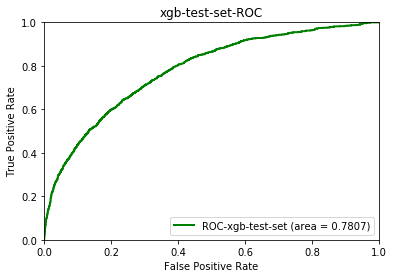

In [64]:
plt.plot(fpr, tpr, lw=2, color="g", label='ROC-xgb-test-set (area = %0.4f)' % (roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('xgb-test-set-ROC')
plt.legend(loc='lower right')
plt.savefig("xgb-test-set-ROC")
plt.show()

In [63]:
fpr, tpr, thresholds = roc_curve(offline_y, pred[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)
ks = abs(fpr - tpr).max()
ks

0.780717699854


0.41220705885342063

In [60]:
offline = offline_xy[["user_id"]]
offline["xgb_prob"] = xgb_pred[:,1]
offline

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


user_id  xgb_prob
32653    32654  0.285644
36081    36082  0.022125
49056    49057  0.371692
29127    29128  0.037831
55186    55187  0.148573
31342    31343  0.125402
47880    47881  0.026312
50989    50990  0.207459
13087    13088  0.046261
6031      6032  0.021969
15738    15739  0.019768
47039    47040  0.054326
55594    55595  0.025934
21742    21743  0.090019
22378    22379  0.024065
39857    39858  0.030687
32052    32053  0.035573
6300      6301  0.105503
32112    32113  0.013602
30421    30422  0.036492
5309      5310  0.017983
33293    33294  0.017055
43473    43474  0.077680
38515    38516  0.050137
26387    26388  0.052919
13399    13400  0.057594
50086    50087  0.052169
21807    21808  0.022933
36551    36552  0.157639
46736    46737  0.140613
...        ...       ...
13536    13537  0.103485
13328    13329  0.018868
54022    54023  0.101458
8203      8204  0.044813
29715    29716  0.029852
51020    51021  0.080882
18557    18558  0.048190
39619    39620  0.020669
52327    52328  0.117434
41026    41027  0.144143
13751    13752  0.033768
52371    52372  0.044574
7446      7447  0.244389
11793    11794  0.031421
14886    14887  0.025150
36754    36755  0.103463
38056    38057  0.021331
37921    37922  0.036341
37578    37579  0.011404
45909    45910  0.042424
12617    12618  0.033181
35409    35410  0.075578
49024    49025  0.012455
48393    48394  0.128041
17373    17374  0.034218
2432      2433  0.082578
51737    51738  0.011823
26661    26662  0.014805
8570      8571  0.029271
7359      7360  0.017119

[8340 rows x 2 columns]

In [61]:
offline.to_csv("C:\\Users\\CDA\\graduated_design\\prob\\xgb_prob_122.csv",index = False,encoding = "utf-8")

In [14]:
param = {"n_estimators" : 400,"colsample_bytree" : 1,"random_state" : 10,"max_depth":4,"subsample" : 0.8,"min_child_weight" : 7,
                         "scale_pos_weight" : 0.6,"gamma" : 0.1,"reg_lambda" : 4,"scale_pos_weight":0.2
    
}
xgb_dtrain = xgb.DMatrix(train_X,label = train_y)
xgb_dval = xgb.DMatrix(val_X,label = val_y)
watchlist = [(xgb_dtrain, 'train'),(xgb_dval, 'val')]

model = xgb.train(param,xgb_dtrain,num_boost_round = 2000,early_stopping_rounds = 200,evals = watchlist,)


[0]	train-rmse:0.404258	val-rmse:0.403615
Multiple eval metrics have been passed: 'val-rmse' will be used for early stopping.

Will train until val-rmse hasn't improved in 200 rounds.
[1]	train-rmse:0.355471	val-rmse:0.354295
[2]	train-rmse:0.334667	val-rmse:0.333246
[3]	train-rmse:0.327928	val-rmse:0.326573
[4]	train-rmse:0.326737	val-rmse:0.325444
[5]	train-rmse:0.328215	val-rmse:0.327059
[6]	train-rmse:0.330206	val-rmse:0.32907
[7]	train-rmse:0.332028	val-rmse:0.331062
[8]	train-rmse:0.333018	val-rmse:0.332183
[9]	train-rmse:0.334049	val-rmse:0.333308
[10]	train-rmse:0.334448	val-rmse:0.333934
[11]	train-rmse:0.335025	val-rmse:0.334569
[12]	train-rmse:0.334923	val-rmse:0.334755
[13]	train-rmse:0.335146	val-rmse:0.335127
[14]	train-rmse:0.335098	val-rmse:0.335177
[15]	train-rmse:0.334896	val-rmse:0.335144
[16]	train-rmse:0.334813	val-rmse:0.335129
[17]	train-rmse:0.334845	val-rmse:0.335187
[18]	train-rmse:0.334761	val-rmse:0.335219
[19]	train-rmse:0.334537	val-rmse:0.335142
[20]	trai

[187]	train-rmse:0.325398	val-rmse:0.332123
[188]	train-rmse:0.325362	val-rmse:0.33213
[189]	train-rmse:0.325331	val-rmse:0.332201
[190]	train-rmse:0.325332	val-rmse:0.332202
[191]	train-rmse:0.325285	val-rmse:0.332211
[192]	train-rmse:0.325223	val-rmse:0.332199
[193]	train-rmse:0.325106	val-rmse:0.332145
[194]	train-rmse:0.325143	val-rmse:0.332181
[195]	train-rmse:0.325122	val-rmse:0.332218
[196]	train-rmse:0.325112	val-rmse:0.332244
[197]	train-rmse:0.324914	val-rmse:0.332124
[198]	train-rmse:0.324935	val-rmse:0.332144
[199]	train-rmse:0.324855	val-rmse:0.332131
[200]	train-rmse:0.324779	val-rmse:0.332079
[201]	train-rmse:0.324813	val-rmse:0.332111
[202]	train-rmse:0.324715	val-rmse:0.332098
[203]	train-rmse:0.324711	val-rmse:0.332094
[204]	train-rmse:0.324668	val-rmse:0.332078
Stopping. Best iteration:
[4]	train-rmse:0.326737	val-rmse:0.325444



('ks', 0.41742540107377846)
('ks', 0.42295320938679926)
('ks', 0.39704352466982112)
('ks', 0.43617114474192642)
('ks', 0.41789044777496864)


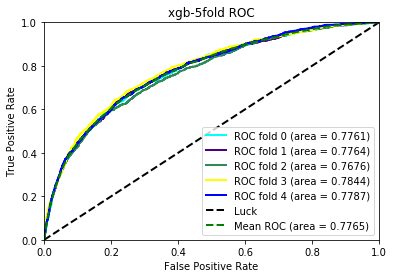

In [69]:
kfold_plot(train_val_x,train_val_y,xgb_model)

In [68]:
def kfold_plot(train_x, train_y, model):
    kf = StratifiedKFold(n_splits=5,random_state = 100)

    scores = []
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    exe_time = []
    colors = ['cyan', 'indigo', 'seagreen', 'yellow', 'blue']
    #cmap = matplotlib.colors.ListedColormap(colors)
    lw = 2

    #flg,ax = plt.subplots(figsize = (8,5))
    i = 0
    for train_index,val_index in kf.split(train_x,train_y):
        t_X, v_X = train_x.iloc[train_index], train_x.iloc[val_index]
        t_y, v_y = train_y.iloc[train_index], train_y.iloc[val_index]
        begin_t = time.time()
        predictions = model(t_X,t_y,v_X)
        end_t = time.time()
        exe_time.append(round(end_t-begin_t, 3))
        scores.append(roc_auc_score(v_y.astype(float), predictions))
        fpr, tpr, thresholds = roc_curve(v_y, predictions)#?
        mean_tpr += interp(mean_fpr, fpr, tpr)#?
        mean_tpr[0] = 0.0#?
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=lw, color=colors[i], label='ROC fold %d (area = %0.4f)' % (i, roc_auc))
        i += 1
        print(ks(predictions,v_y))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k', label='Luck')
    mean_tpr /= kf.get_n_splits(train_val_x, train_val_y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)    
    plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--', label='Mean ROC (area = %0.4f)' % mean_auc, lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('xgb-5fold ROC')
    plt.legend(loc='lower right')
    plt.savefig("xgb-5fold-ROC")
    plt.show()
def xgb_model(train_x,train_y,val_x):
    xgb_model = xgb.XGBClassifier(n_estimators = 400,colsample_bytree = 1,random_state = 10,max_depth=4,subsample = 0.8,min_child_weight = 7,
                         scale_pos_weight = 0.6,gamma = 0.1,reg_lambda = 4,learning_rate = 0.04)  
    xgb_model.fit(train_x,train_y)
    pred = xgb_model.predict_proba(val_x)
    return pred[:,1]    

In [35]:
#kfold_plot(train_val_x,train_val_y,xgb_model)
xgb_model = xgb.XGBClassifier(n_estimators = 400,colsample_bytree = 1,random_state = 10,max_depth=4,subsample = 0.8,min_child_weight = 7,
                         scale_pos_weight = 0.6,gamma = 0.1,reg_lambda = 4,learning_rate = 0.05)  
xgb_model.fit(train_val_x,train_val_y)
pred = xgb_model.predict_proba(offline_x)

In [50]:
feature_name = pd.DataFrame(train_X.columns,columns = ["feature_name"])
xgb_feature_importance_score = pd.DataFrame(xgb_model.feature_importances_,columns = ["xgb_score"])
xgb_importance = pd.merge(feature_name,xgb_feature_importance_score,left_index = True,right_index = True)
xgb_importance

feature_name  xgb_score
0                        bill_bank_card_num   0.003605
1                   bl_last_bill_amountmean   0.013419
2                       bl_credit_limitmean   0.009013
3                       bl_bill_balancemean   0.010415
4                 bl_lowest_repay_limitmean   0.009814
5                         bl_consum_nummean   0.010815
6                        bl_bill_amountmean   0.012217
7                   bl_avail_cash_limitmean   0.015622
8             bl_bill_diff_repay_amountmean   0.027639
9    bl_credit_limit_diff_last_bill_amomean   0.016423
10        bl_credit_limit_diff_bill_amomean   0.010214
11    bl_credit_limit_diff_bill_balancemean   0.009613
12           bl_bill_amo_div_consum_nummean   0.008412
13              bl_grant_diff_bill_timemean   0.018226
14                   bl_last_bill_amountmax   0.009213
15                       bl_credit_limitmax   0.004606
16                       bl_bill_balancemax   0.013819
17                 bl_lowest_repay_limitmax   0.014821
18                         bl_consum_nummax   0.001402
19                        bl_bill_amountmax   0.009013
20                   bl_avail_cash_limitmax   0.010415
21             bl_bill_diff_repay_amountmax   0.026237
22    bl_credit_limit_diff_last_bill_amomax   0.005808
23         bl_credit_limit_diff_bill_amomax   0.009013
24     bl_credit_limit_diff_bill_balancemax   0.014220
25            bl_bill_amo_div_consum_nummax   0.015221
26               bl_grant_diff_bill_timemax   0.013219
27                   bl_last_bill_amountstd   0.006810
28                       bl_credit_limitstd   0.004606
29                       bl_bill_balancestd   0.008612
..                                      ...        ...
143                        bh_time_max_diff   0.018426
144                       grant_bh_diff_bef   0.032445
145                              has_record   0.000000
146                        total_counts_bef   0.007811
147                         dup_counts_time   0.063889
148                                gender_0   0.022231
149                                gender_1   0.001202
150                                gender_2   0.006409
151                             ocupation_0   0.000000
152                             ocupation_2   0.001602
153                             ocupation_3   0.000601
154                             ocupation_4   0.001001
155                             education_0   0.000000
156                             education_2   0.005808
157                             education_3   0.001001
158                             education_4   0.005808
159                              marriage_0   0.000000
160                              marriage_1   0.002604
161                              marriage_2   0.002403
162                              marriage_3   0.000801
163                              marriage_4   0.001602
164                             residence_0   0.000000
165                             residence_1   0.002403
166                             residence_2   0.002003
167                             residence_3   0.001202
168                             residence_4   0.003605
169                        bank_expenditure   0.007010
170                            bank_revenue   0.007811
171                             bank_income   0.005207
172                     bank_diff_rev_exped   0.013219

[173 rows x 2 columns]

In [51]:
xgb_importance.to_csv("C:\\Users\\CDA\\graduated_design\\score\\xgb_importance.csv",index = False,encoding = "utf-8")

In [41]:
offline = offline_xy[["user_id"]]
offline["prob"] = pred[:,1]


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [45]:
#offline = offline.reset_index()
#del offline["index"]
offline.rename(columns = {"prob":"xgb_prob"},inplace = True)

In [49]:
offline.to_csv("C:\\Users\\CDA\\graduated_design\\prob\\xgb_prob.csv",index = False,encoding = "utf-8")

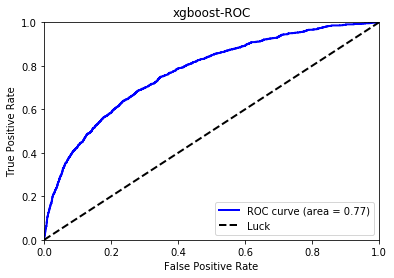

In [23]:
from scipy import interp  
import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve, auc  
lw = 2
fig,ax = plt.subplots(figsize = (6,4))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

fpr, tpr, thresholds = roc_curve(val_y, pred_xgb[:,1])#?
mean_tpr += interp(mean_fpr, fpr, tpr)#?
mean_tpr[0] = 0.0#?
roc_auc = auc(fpr, tpr)
ax.plot(fpr, tpr, lw=lw, color="b", label='ROC curve (area = %0.2f)' % ( roc_auc))
ax.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k', label='Luck')
#mean_tpr /= kf.get_n_splits(train, ytrain)
#mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)    
#ax.plot(mean_fpr, mean_tpr, color='b', linestyle='--', label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('xgboost-ROC')
ax.legend(loc='lower right')
plt.savefig("xgboost test ROC")
plt.show()

In [66]:
def ks(y_predicted, y_true):
    label=y_true
    fpr,tpr,thres = metrics.roc_curve(label,y_predicted,pos_label=1)
    return 'ks',abs(fpr - tpr).max()

In [103]:
predict_offline = model.predict(xgb_offline_test,ntree_limit=model.best_iteration)#
offline=offline_test[["user_id","is_overdue"]]
offline["predict_offline"]=predict_offline
print(ks(offline.predict_offline,offline.is_overdue))


('ks', 0.5214462061334586)


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [76]:
params1 = {
    "booster":"gbtree",
    "objective":"binary:logistic",
    "scale_pos_weight" : 1.0/7.7,
    "eval_metric" : "auc",
    "gamma" : 0.1,
    "max_depth" : 7,
    "lambda" : 3,
    "subsample" : 0.7,
    "colsample_bytree" : 0.7,
    "min_child_weight" : 2.5,
    "seed" : 12,
    "eta" : 0.1,
}

In [102]:
from pandas import DataFrame,Series
s = Series(model.get_fscore())
d = pd.DataFrame(s,columns = ["f_score"])
d = d.sort_values("f_score",ascending = False)
d.to_csv("C:\\Users\\CDA\\graduated_design\\score\\all_165.csv",header = True,encoding = "utf8")

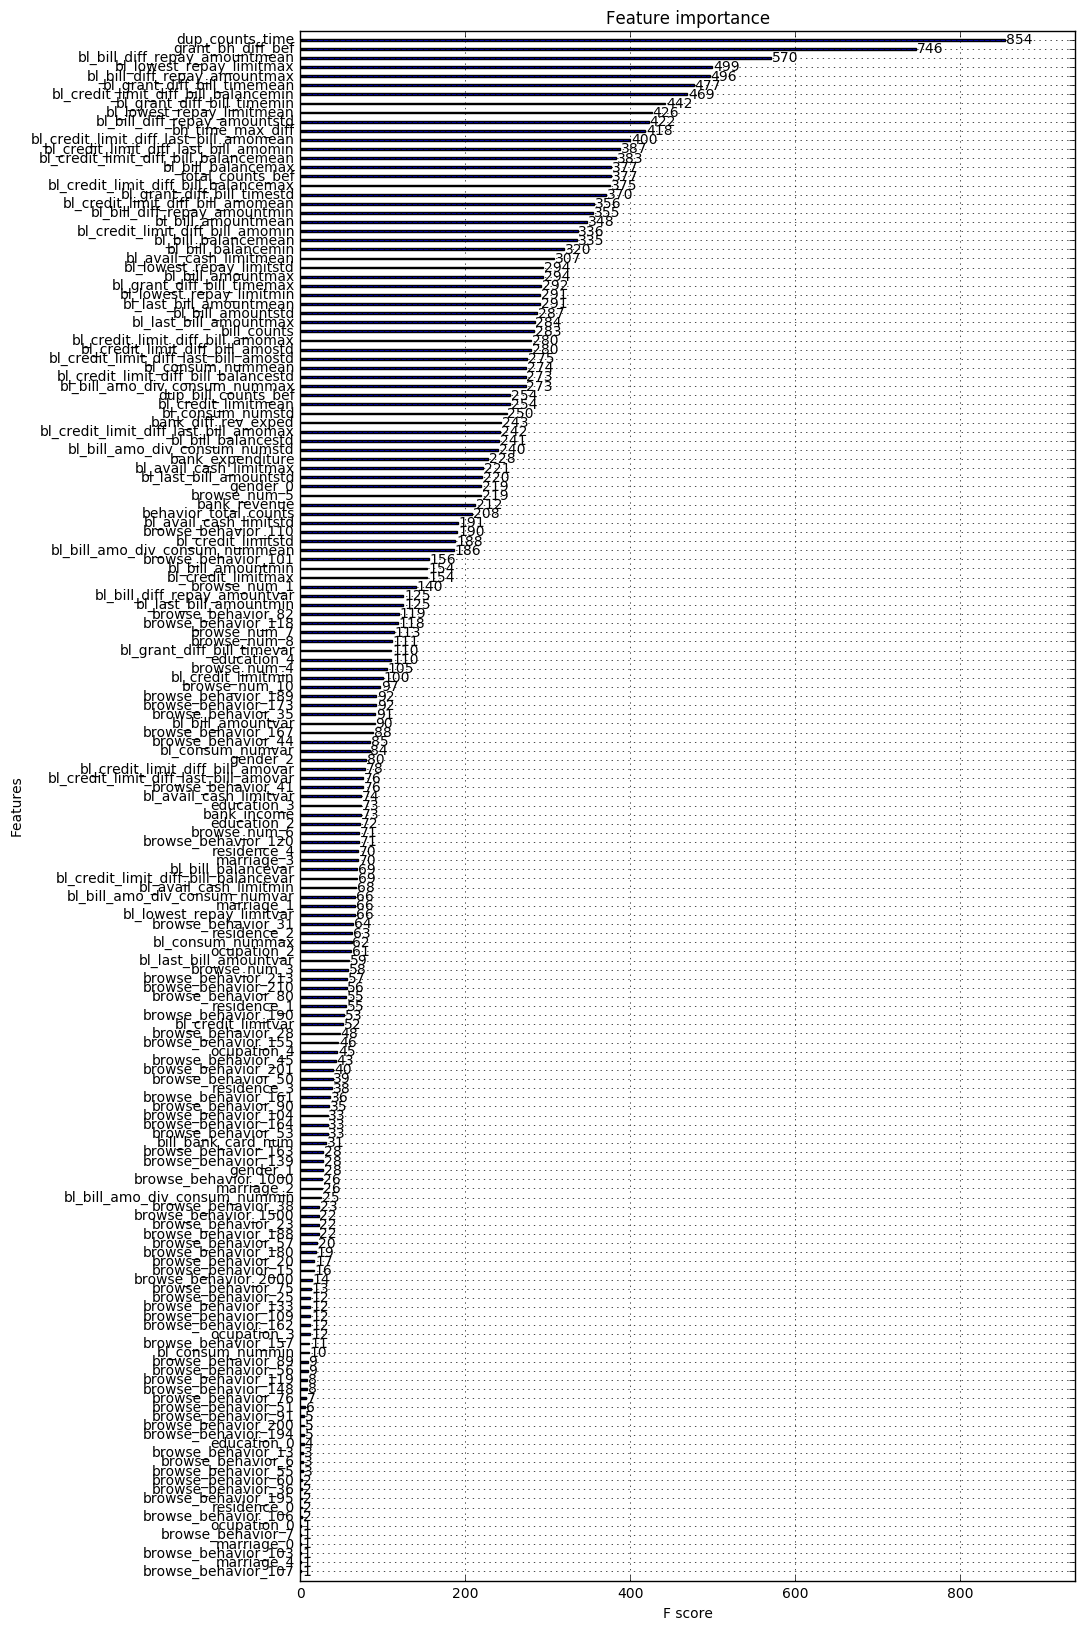

In [97]:
fig,ax = plt.subplots(figsize = (10,20))
xgb.plot_importance(model,ax = ax)
plt.savefig("all_0779_score")
plt.show()


In [28]:
?plt.savefig

In [136]:
mean_tpr = 0.0    
mean_fpr = np.linspace(0, 1, 100)    
all_tpr = []  
  
y_target = np.r_[train_y,test_y]  
cv = StratifiedKFold(y_target, n_folds=6)  
  
#画ROC曲线和计算AUC  
fpr, tpr, thresholds = roc_curve(test_y, predict,pos_label = 1)##指定正例标签，pos_label = ###########在数之联的时候学到的，要制定正例  

mean_tpr += interp(mean_fpr, fpr, tpr)#对mean_tpr在mean_fpr处进行插值，通过scipy包调用interp()函数    
mean_tpr[0] = 0.0#初始处为0    
roc_auc = auc(fpr, tpr)    
#画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数能计算出来    
plt.plot(fpr, tpr, lw=1, label='ROC  %s (area = %0.3f)' % (classifier, roc_auc))   

NameError: name 'train_y' is not defined

In [114]:
import pickle
with open('C:\\Users\\CDA\\github\\DataCastle-wepon\\code\\M2\\params_for_reproducing.pkl','r') as f:
        random_seed,feature_num,rank_feature_num,discret_feature_num,gamma,max_depth,lambd,subsample,colsample_bytree,min_child_weight = pickle.load(f)
        

TypeError: a bytes-like object is required, not 'str'

In [120]:
b =range(3,50,2)

In [122]:
a = np.arange(100)
a = Series(a)

In [126]:
a.index = range(1,300,3)

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc 
###计算roc和auc
from sklearn import cross_validation
from sklearn.multiclass import OneVsRestClassifier
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
###变为2分类
X, y = X[y != 2], y[y != 2]
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=.3,random_state=0)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, y_score) 
###计算真正率和假正率
roc_auc = auc(fpr,tpr) 
###计算auc的值 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
###假正率为横坐标,真真率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 

ImportError: numpy.core.multiarray failed to import

In [137]:
from sklearn import model_selection

ImportError: cannot import name 'comb'